<a href="https://colab.research.google.com/github/Konwalai1111/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [1]:
from sklearn.datasets import load_digits#scikit_learn

digits = load_digits()
X,y = digits.data, digits.target

print(f"Shape of data: {X.shape}")
print(f"Shape of target: {y.shape}")
print(f"Number of classes: {len(digits.target_names)}")
print(f"First 5 target labels: {y[:5]}")

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes: 10
First 5 target labels: [0 1 2 3 4]


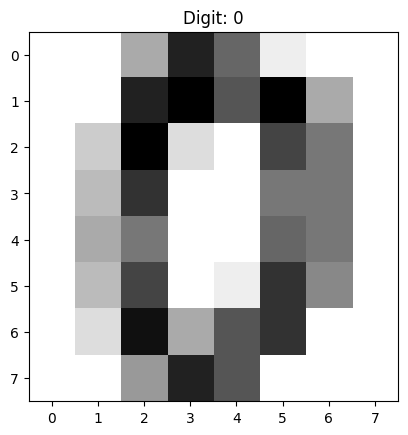

In [2]:
import matplotlib.pyplot as plt

first_image = X[0]
first_label = y[0]

image_reshaped = first_image.reshape(8, 8)

plt.imshow(image_reshaped, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Digit: {first_label}")
plt.show()

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes: 10


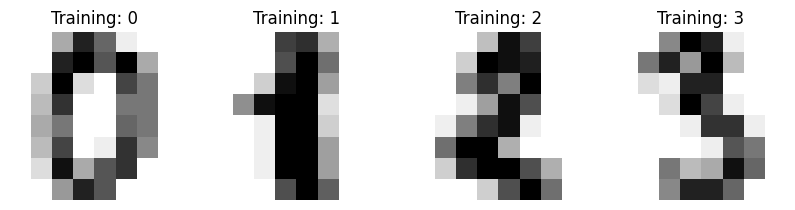

In [3]:
from sklearn.datasets import load_digits

# Load the MNIST dataset (a subset of the full MNIST dataset)
mnist = load_digits()

# Display the shape of the data and target
print(f"Shape of data: {mnist.data.shape}")
print(f"Shape of target: {mnist.target.shape}")

# You can also see the number of classes and some images if needed
print(f"Number of classes: {len(mnist.target_names)}")
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist.images, mnist.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")
plt.show()

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target

print("DataFrame create successfully with shape:", df.shape)
df.head()

DataFrame create successfully with shape: (1797, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
X.shape

(1797, 64)

In [7]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

# Model Construction

- import
- define (hyper-parameter)
- train (fitting)
- evoluate (train vs. test)

## import

In [8]:
from sklearn.tree import DecisionTreeClassifier

## define

In [9]:
tree0 = DecisionTreeClassifier(random_state=6)

## training

In [10]:
tree0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

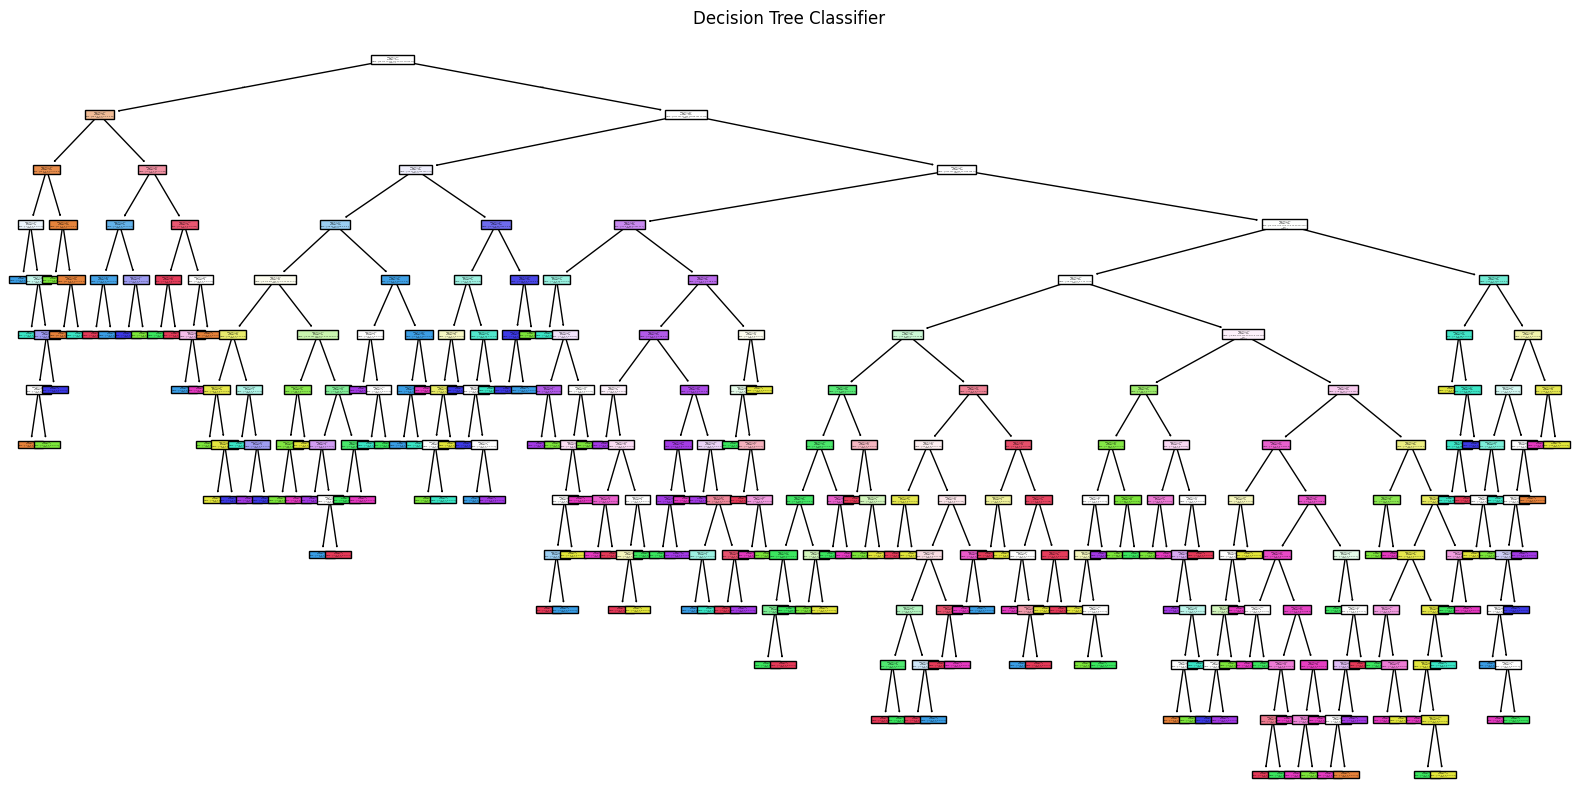

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree0, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(len(digits.target_names))])
plt.title("Decision Tree Classifier")
plt.show()

## Evoluate

In [12]:
train_accuracy = tree0.score(X_train, y_train)
test_accuracy = tree0.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.7938


In [13]:
y_predict = tree0.predict(X_test)

In [14]:
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [15]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7938


In [17]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predict, target_names=[str(i) for i in digits.target_names]))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.80      0.89        10
           2       0.88      0.70      0.78        10
           3       0.40      0.20      0.27        10
           4       0.83      1.00      0.91        10
           5       0.71      0.56      0.62         9
           6       0.77      1.00      0.87        10
           7       0.91      1.00      0.95        10
           8       0.54      0.70      0.61        10
           9       0.82      1.00      0.90         9

    accuracy                           0.79        97
   macro avg       0.79      0.80      0.78        97
weighted avg       0.78      0.79      0.78        97



## Pre-pruning (hyper-parameter tuning)

In [18]:
from sklearn.tree import DecisionTreeClassifier #import
tree1 = DecisionTreeClassifier(random_state=6, max_depth=3) #define
tree1.fit(X_train,y_train) #train

DecisionTreeClassifier(max_depth=3, random_state=6)

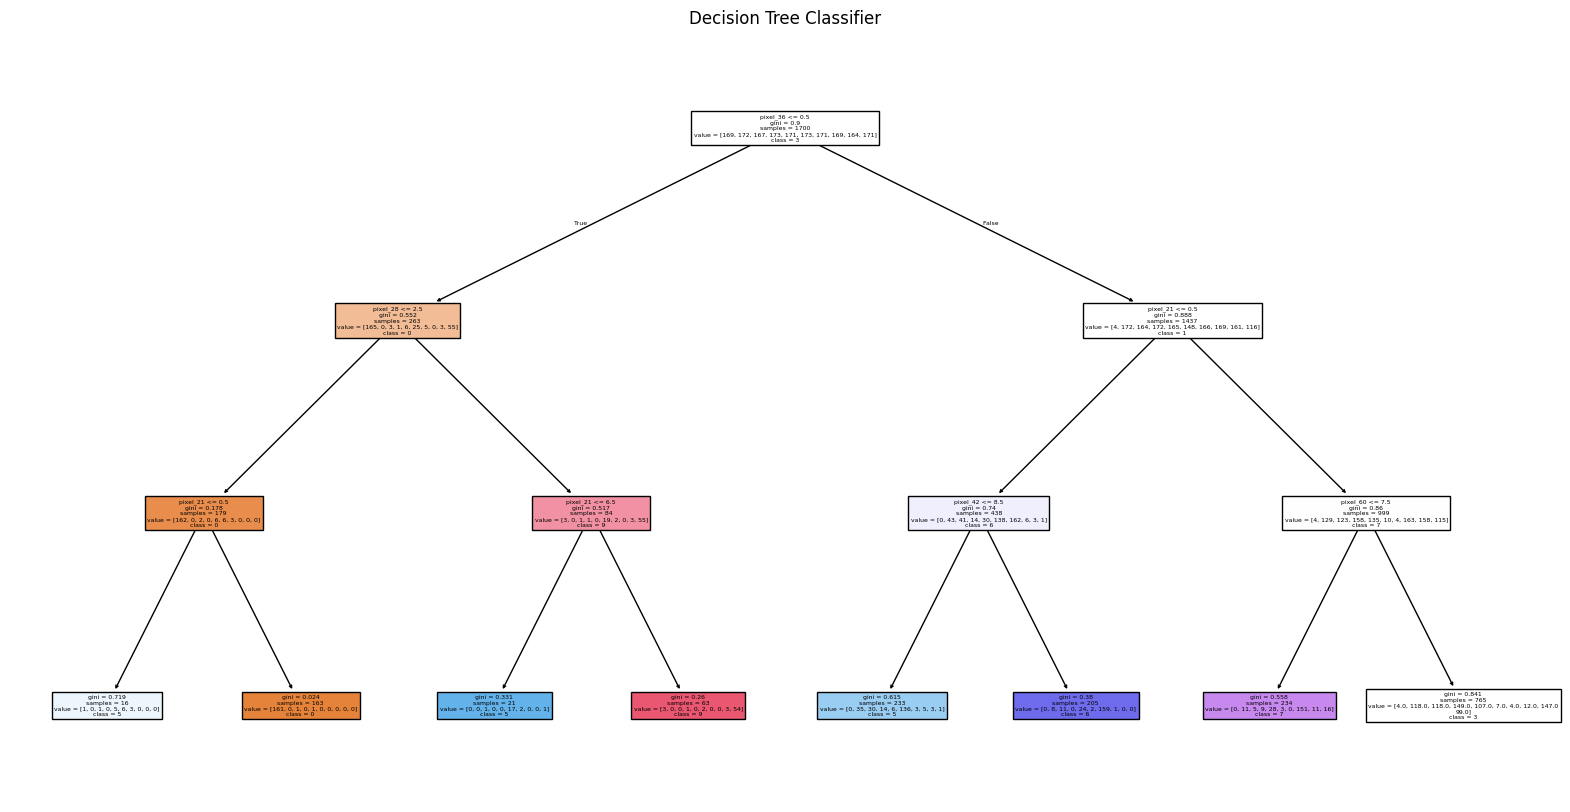

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(len(digits.target_names))])
plt.title("Decision Tree Classifier")
plt.show()

## Evaluate

In [20]:
accuracy = tree1.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4639


## Tree 2

In [21]:
from sklearn.tree import DecisionTreeClassifier #import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7) #define
tree2.fit(X_train,y_train) #train
accuracy = tree2.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7938


#Quiz 11

In [22]:
X1_train = X[:1750]
y1_train = y[:1750]
X1_test = X[1750:]
y1_test = y[1750:]

In [23]:
from sklearn.tree import DecisionTreeClassifier #import
tree3 = DecisionTreeClassifier(random_state=6, max_depth=9) #define
tree3.fit(X1_train,y1_train) #train
accuracy = tree3.score(X1_test, y1_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8936


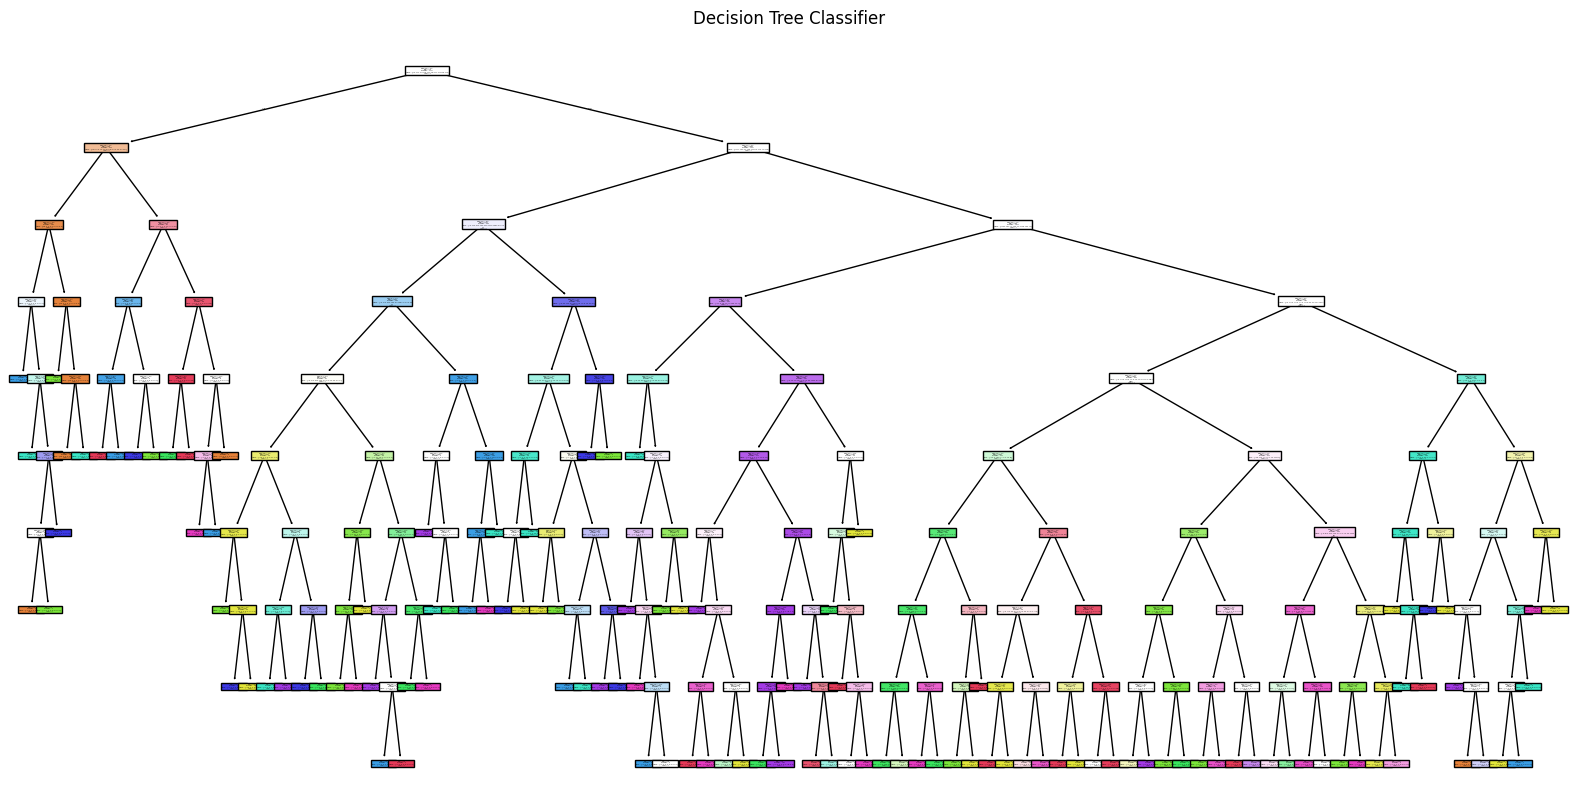

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree3, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(len(digits.target_names))])
plt.title("Decision Tree Classifier")
plt.show()

#Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
# Using random_state for reproducibility
rf_classifier = RandomForestClassifier(random_state=6, n_estimators=100)

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
rf_accuracy = rf_classifier.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.9588


# Model Selection and Evalution

# Task
Create a stratified train-test split for the dataset, ensuring both the training and testing sets have the same proportion of classes as the original dataset. Then, define hyperparameter grids for KNeighborsClassifier and DecisionTreeClassifier. After that, perform a 10-fold cross-validation with GridSearchCV for both models on the training data using 'accuracy' as the evaluation metric. Finally, evaluate the best KNN and Decision Tree models on the test set, and compare their performance based on accuracy.

## Stratified Train-Test Split

### Subtask:
Split the main dataset (X, y) into training and testing sets. This split will be stratified to ensure that both the training and testing sets have the same proportion of classes as the original dataset. A common split is 80% for training and 20% for testing.


**Reasoning**:
To perform a stratified train-test split, I need to import the `train_test_split` function from `sklearn.model_selection`.



In [26]:
from sklearn.model_selection import train_test_split

print("train_test_split imported successfully.")

train_test_split imported successfully.


**Reasoning**:
Now that `train_test_split` is imported, I will use it to split the data (X, y) into stratified training and testing sets as specified in the instructions, with a test size of 0.2 and a random state of 42 for reproducibility.



In [27]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"X_train_stratified shape: {X_train_stratified.shape}")
print(f"X_test_stratified shape: {X_test_stratified.shape}")
print(f"y_train_stratified shape: {y_train_stratified.shape}")
print(f"y_test_stratified shape: {y_test_stratified.shape}")

X_train_stratified shape: (1437, 64)
X_test_stratified shape: (360, 64)
y_train_stratified shape: (1437,)
y_test_stratified shape: (360,)


## Define Hyperparameter Grids

### Subtask:
Define hyperparameter grids for `KNeighborsClassifier` and `DecisionTreeClassifier`. These grids will be used later with `GridSearchCV` to find the best parameters for each model.

**Reasoning**:
To define the hyperparameter grids, I first need to import the `KNeighborsClassifier` and `DecisionTreeClassifier` from `sklearn.neighbors` and `sklearn.tree` respectively.



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

print("KNeighborsClassifier and DecisionTreeClassifier imported successfully.")

KNeighborsClassifier and DecisionTreeClassifier imported successfully.


**Reasoning**:
Now that the classifiers are imported, I will define the hyperparameter grids as Python dictionaries for `KNeighborsClassifier` and `DecisionTreeClassifier` as specified in the subtask.



In [29]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grids for KNN and Decision Tree defined successfully.")

Hyperparameter grids for KNN and Decision Tree defined successfully.


## Perform GridSearchCV with Cross-Validation

### Subtask:
Perform a 10-fold cross-validation with `GridSearchCV` for both `KNeighborsClassifier` and `DecisionTreeClassifier` on the training data (`X_train_stratified`, `y_train_stratified`) using 'accuracy' as the evaluation metric.

**Reasoning**:
To perform GridSearchCV, I need to import the `GridSearchCV` class from `sklearn.model_selection`.



In [30]:
from sklearn.model_selection import GridSearchCV

print("GridSearchCV imported successfully.")

GridSearchCV imported successfully.


**Reasoning**:
Now that `GridSearchCV` is imported and the hyperparameter grids are defined, I will initialize and perform GridSearchCV for the `KNeighborsClassifier` using its `knn_param_grid` and the stratified training data. I will use 10-fold cross-validation and 'accuracy' as the scoring metric.



In [31]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10, scoring='accuracy')
knn_grid_search.fit(X_train_stratified, y_train_stratified)

print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best cross-validation accuracy for KNN:", knn_grid_search.best_score_)

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.9895541958041958


**Reasoning**:
With GridSearchCV for `KNeighborsClassifier` completed, I will now initialize and perform GridSearchCV for the `DecisionTreeClassifier` using its `dt_param_grid` and the stratified training data, adhering to the 10-fold cross-validation and 'accuracy' scoring metric as specified in the subtask.



In [32]:
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=10, scoring='accuracy')
dt_grid_search.fit(X_train_stratified, y_train_stratified)

print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best cross-validation accuracy for Decision Tree:", dt_grid_search.best_score_)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.8621697746697746


## Evaluate Best Models on Test Set and Compare Performance

### Subtask:
Evaluate the best `KNeighborsClassifier` and `DecisionTreeClassifier` models (found using `GridSearchCV`) on the stratified test set (`X_test_stratified`, `y_test_stratified`). After evaluation, compare their performance based on accuracy.

**Reasoning**:
Now that the GridSearchCV processes are complete, I will retrieve the best estimators for both `KNeighborsClassifier` and `DecisionTreeClassifier` and evaluate their performance on the stratified test set to calculate their accuracies. This directly addresses the first part of the current subtask.



In [33]:
best_knn_model = knn_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_

knn_test_accuracy = best_knn_model.score(X_test_stratified, y_test_stratified)
dt_test_accuracy = best_dt_model.score(X_test_stratified, y_test_stratified)

print(f"Best KNN Model Test Accuracy: {knn_test_accuracy:.4f}")
print(f"Best Decision Tree Model Test Accuracy: {dt_test_accuracy:.4f}")

if knn_test_accuracy > dt_test_accuracy:
    print("\nThe Best KNN Model performs better on the test set.")
elif dt_test_accuracy > knn_test_accuracy:
    print("\nThe Best Decision Tree Model performs better on the test set.")
else:
    print("\nBoth models perform equally well on the test set.")

Best KNN Model Test Accuracy: 0.9861
Best Decision Tree Model Test Accuracy: 0.8222

The Best KNN Model performs better on the test set.


## Summary:

### Q&A
The comparison of model performance on the test set revealed that the Best K-Nearest Neighbors (KNN) Model performed better than the Best Decision Tree Model.

### Data Analysis Key Findings
*   The dataset was successfully split into a stratified training set of 1437 samples and a stratified testing set of 360 samples, maintaining the original class proportions.
*   For K-Nearest Neighbors, the `GridSearchCV` identified `n_neighbors: 3` and `weights: 'uniform'` as the best parameters, achieving a best cross-validation accuracy of 0.9896.
*   For Decision Tree, the `GridSearchCV` identified `max_depth: 10`, `min_samples_leaf: 2`, and `min_samples_split: 2` as the best parameters, with a best cross-validation accuracy of 0.8622.
*   On the unseen test set, the best K-Nearest Neighbors model achieved an accuracy of 0.9861.
*   On the unseen test set, the best Decision Tree model achieved an accuracy of 0.8222.

### Insights or Next Steps
*   The K-Nearest Neighbors model demonstrated significantly higher performance on both cross-validation and the test set compared to the Decision Tree model for this dataset, suggesting it is the preferred model.
*   Further analysis could involve exploring other classification algorithms or ensemble methods to potentially achieve even higher accuracy, or examining the misclassified instances to understand the Decision Tree's limitations.
